### Consigna n°2

Dado el siguiente [dataset](https://github.com/FundamentosInformaticaUCEMA/Simulacro_P2_2022/blob/master/data.csv), resolvé los siguiente incisos:

a) Cargá los datos en un data frame, inspeccionalo y caracterizalo.

b) Limpiá el data frame de las 3 posibles anomalías que pueda contener. Luego, de ser necesario, normalizá las columnas que hagan falta.

c) La cadena de supermercados "La Mocha" está evaluando crear tarjetas con beneficios para las personas que compran en ella, por lo que se disponen a agrupar a estas personas dependiendo de el ingreso que tienen y la cantidad que gastan, a fin de generar dos o tres grupos a los cuales se les va a asignar una tarjeta con ciertos beneficios.
Detallá los pasos a seguir para que, a partir del data frame curado (sin las anomalías) se obtengan los grupos requeridos y cómo evalúa si lo realizado es correcto. AVISO: para este punto no hay que ejecutar código, sino detallar los pasos.

d) Dados los gráficos ([Codo1](https://github.com/FundamentosInformaticaUCEMA/Simulacro_P2_2022/blob/master/Codo1.png) y [Silhouette1](https://github.com/FundamentosInformaticaUCEMA/Simulacro_P2_2022/blob/master/Silhouette1.png) por un lado, y [Codo2](https://github.com/FundamentosInformaticaUCEMA/Simulacro_P2_2022/blob/master/Codo2.png) y [Silhouette2](https://github.com/FundamentosInformaticaUCEMA/Simulacro_P2_2022/blob/master/Silhouette2.png) por otro), analizar y evaluar si el proceso de clustering fue correcto en cada caso. Explicitar tanto lo que está bien como lo que considerás que está mal.


aux:en parcial seguramente nos van a poner codigo base y nosotros lo tenemos que ir modificando segun guille
aux ->pasos en general
recibimos df
lo inspeccionamos y caracterizamos
hacemos limpieza->sacamos repeticiones(duplicados), vemos que hacer con los datos nulos y outliers
normalizar o escalar columnas que hagan falta
clustering

In [1]:
#antes que nada instalar todas las bibliotecas que voy a necesitar asi ya me olvido:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import stats






ENUNCIADO a) Cargá los datos en un data frame, inspeccionalo y caracterizalo.

In [2]:
datos=pd.read_csv("data.csv") #cargo datos en un df ->(este csv tiene que estar guardado en misma carpeta que resulevo este ej para poder ponerlo asi solo por el nombre)
datos.head() #aux para ver que onda

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847


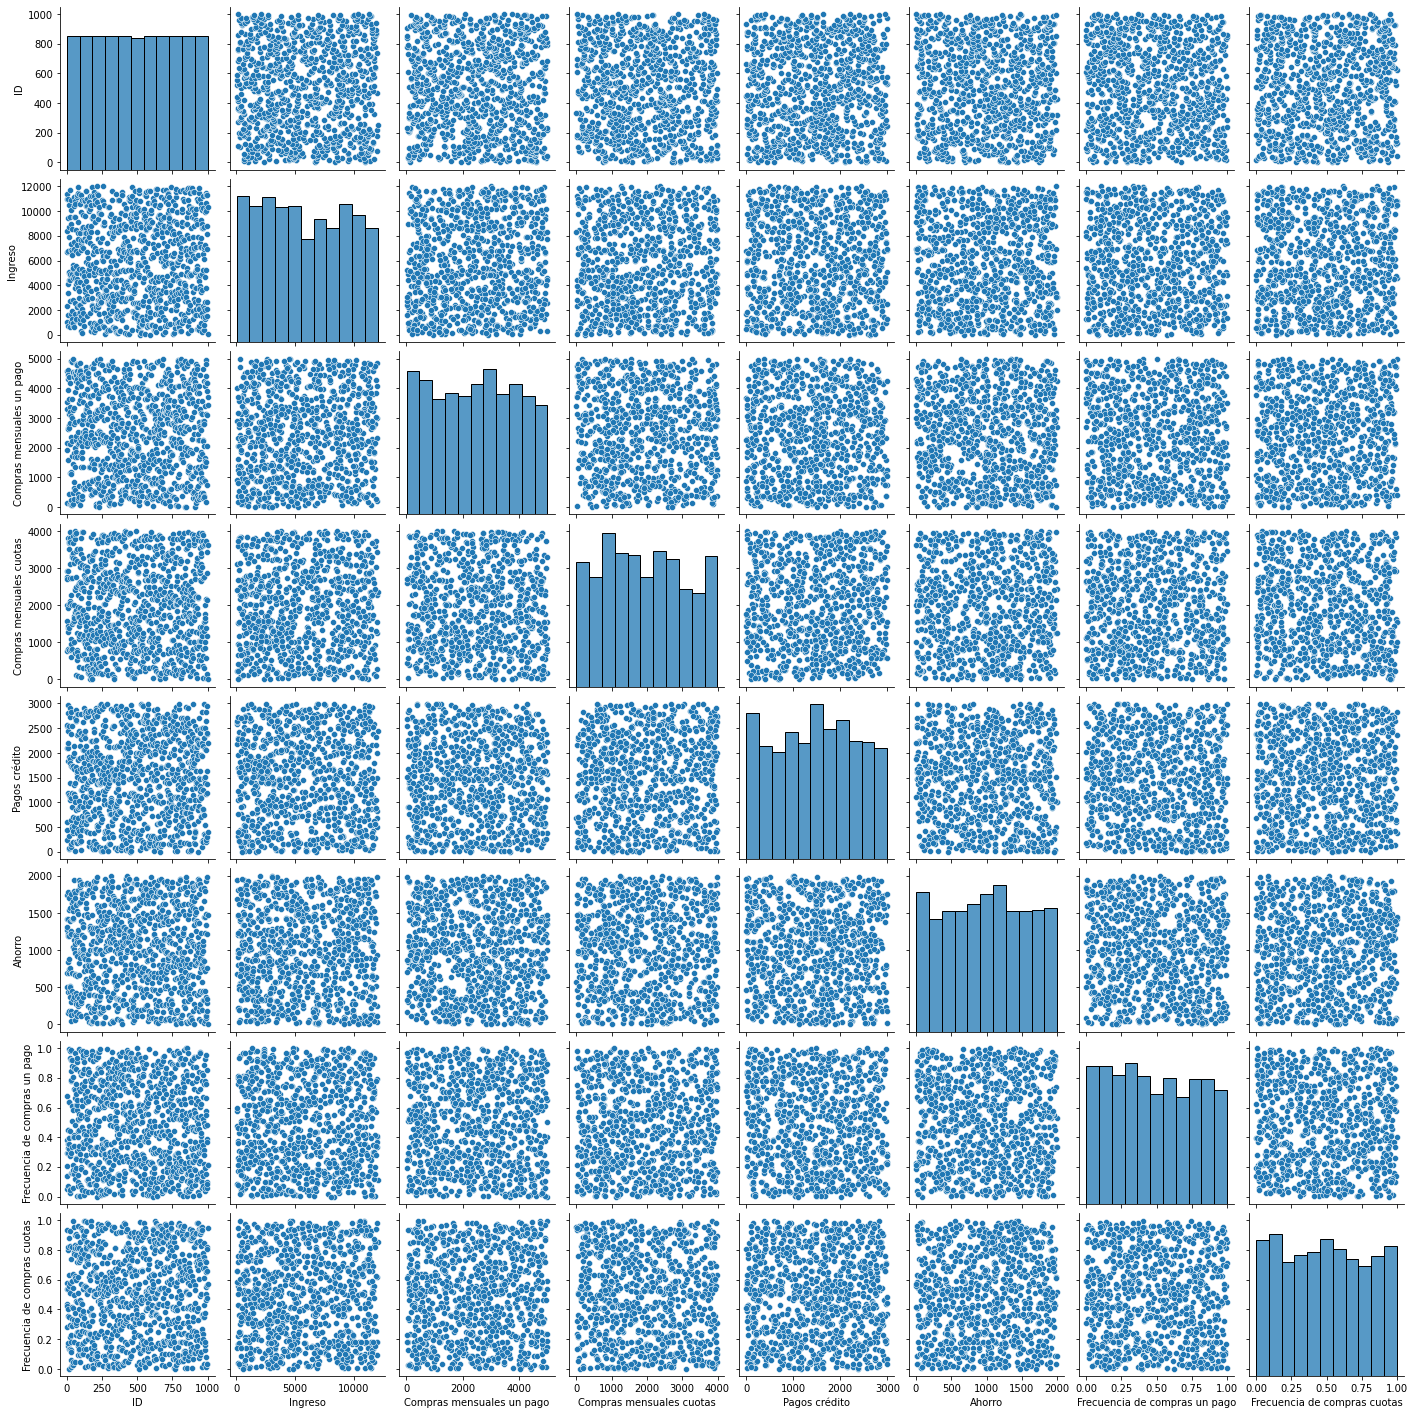

In [17]:
sns.pairplot(datos)
#en diagonal me da los graficos de cada uno

<AxesSubplot:xlabel='Ingreso', ylabel='Count'>

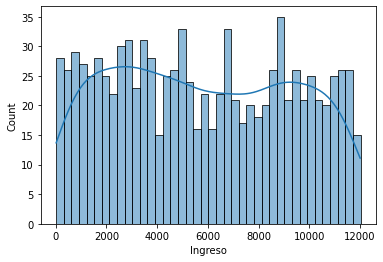

In [28]:
#para inspeccionar ->en este caso hice solo para columna "ingreso"
sns.histplot(data=datos, x="Ingreso", binwidth=300, kde=True) #data=nombre de nuestro df, x=nombre de columna que queremos ver de nuestra tablita, binwidth=ancho de los bins(columnas)(agrupa datos de a la cantidad que yo le indique), kde=kernel density estimation(linea de densidad)
#que esto no tenga forma de campana ya es un indicio de que no es normal, pero de todas formas para ver si es normal o no hay q hacer test de normalidad

In [13]:
#aux para saber cuales son sus columnas
list(datos.columns)

['ID',
 'Nombre',
 'Apellido',
 'Mail',
 'Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

In [14]:
#para inspeccionar->nos dice nombre de las columnas:
#de que tipo es cada columna:(int, float, object(cualquier cosa que no sea nro->es str en general)) y dice cantidad de datos no nulos por columna(arriba dice rageindex:1000 entries(eso es cant de entradas, ese nro -datos no nulos, me da datos nulos por columna))
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             1000 non-null   int64  
 1   Nombre                         1000 non-null   object 
 2   Apellido                       1000 non-null   object 
 3   Mail                           1000 non-null   object 
 4   Ingreso                        968 non-null    float64
 5   Compras mensuales un pago      948 non-null    float64
 6   Compras mensuales cuotas       921 non-null    float64
 7   Pagos crédito                  943 non-null    float64
 8   Ahorro                         948 non-null    float64
 9   Frecuencia de compras un pago  941 non-null    float64
 10  Frecuencia de compras cuotas   943 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 86.1+ KB


<AxesSubplot:>

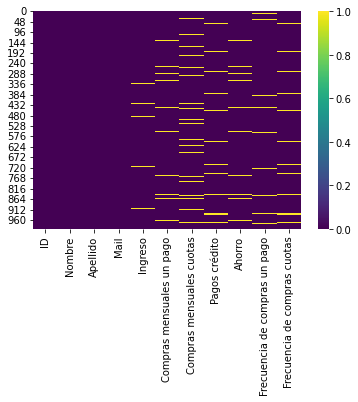

In [15]:
#inspección de los datos de forma visual
#Grafico para saber donde estan los datos nulos en q columna y en que fila ->lineas amarillas muestran los datos nulos con respecto a datos totales
sns.heatmap(datos.isnull(), cmap='viridis') #Aux: (nombre de df.isnull(), cmap:color

In [16]:
#para inspeccionar-> muestra para cada columna numerica, cantidad, media, desvio estandar, min, max, los quartiles
datos.describe()
#viendo media y mediana no podemos asegurar si es o no normal, para esto hay que hacer test de normalidad

,ID,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
count,1000.000000,968.000000,948.000000,921.000000,943.000000,948.000000,941.000000,943.000000
mean,500.500000,5785.631942,2451.846814,1944.068100,1480.925249,997.056951,0.482726,0.490983
std,288.819436,3496.756511,1433.223014,1141.592949,853.214458,573.771676,0.291558,0.290396
min,1.000000,16.150000,1.340000,3.120000,2.880000,3.000000,0.000100,0.000100
25%,250.750000,2717.545000,1229.677500,969.480000,772.330000,495.585000,0.228100,0.232300
50%,500.500000,5571.940000,2502.785000,1864.080000,1490.160000,1000.285000,0.471600,0.500300
75%,750.250000,8839.272500,3665.605000,2839.340000,2187.705000,1473.930000,0.741500,0.738800
max,1000.000000,11999.600000,4993.010000,3994.230000,2999.320000,1999.420000,0.999600,0.998100


In [29]:
#para ver si es normal o no, hago un test de normalidad->test de shapiro 
w, p=stats.shapiro(datos["Ingreso"]) #w:valor estadistico, p:valor p-value->si es mayor a 0.05 nuestra distribucion es normal y si es menor a 0.05 no es normal
#nos da mucho mas chico que 0.05, por lo tanto no es normal

In [30]:
p #auxiliar: deberia dar otro nro segun guille ->CONSULTAR

1.0

In [31]:
col=list(datos.columns)

In [32]:
col

['ID',
 'Nombre',
 'Apellido',
 'Mail',
 'Ingreso',
 'Compras mensuales un pago',
 'Compras mensuales cuotas',
 'Pagos crédito',
 'Ahorro',
 'Frecuencia de compras un pago',
 'Frecuencia de compras cuotas']

In [34]:
col_que_queremos=col[4:] #tomo solo las columnas que me interesan para hacer el test de normalidad->me interesa solo evaluar la de los datos numericos(excepto la de ID, xq es un indice(1,2,3,4,etc))

In [36]:
#aux:deberia dar otro nro segun guille ->CONSULTAR
for elemento in col_que_queremos: #para cada elemento de la lista col_que_queremos hago el test de normalidad
    w, p=stats.shapiro(datos[elemento])
    print(p)
   # if p<0.05:
     #   print("No es normal")
    #else:
     #   print("Es normal")

1.0
Es normal
1.0
Es normal
1.0
Es normal
1.0
Es normal
1.0
Es normal
1.0
Es normal
1.0
Es normal


aux:si es normal la distribucion -> no sera necesario escalarlo (no es necesario normalizarlo)


In [39]:
dfn=datos[col_que_queremos] #aca filtre solo las columnas que me interesan para hacer el test de normalidad (aux: df[lista de columnas que me interesan])
dfn

,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...
995,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
996,11300.85,NaN,2866.75,2949.20,NaN,0.0848,0.6572
997,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


ENUNCIADO b) Limpiá el data frame de las 3 posibles anomalías que pueda contener. Luego, de ser necesario, normalizá las columnas que hagan falta.

las anomalias son 3:datos nulos, datos duplicados y outlyers
datos nulos(no aportan a estadistica en si, pero si aportan al nro
datos duplicados(filas duplicadas por como se hizo el df->nos dara error al hacer cualquier estadistica)
los outlyers(afectan a la distribucion->no explican la distribucion los outlyers)

<AxesSubplot:xlabel='Ingreso', ylabel='Count'>

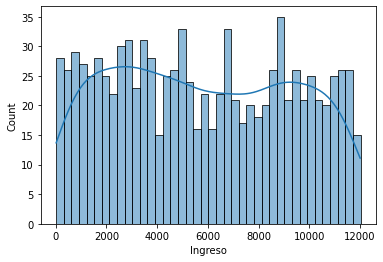

In [40]:
#outliers: los outliers son los datos que estan alejados de la forma general de la ditribucion, no estan aportando informacion (si saco los outliers distribucion sigue siendo la misma, pero si saco datos de la forma general quizas cambie)
#outliers:son los datos que estan lejos de la curva que representa mi distribucion)
#auxiliar: deberia dar otro grafico segun guille ->CONSULTAR
#aux:EN CASO DE LOS NRO QUE ME DEBERIA DAR-> graficamente la froma general aca es de 0 12.000 de ingreso, a la izq y a la der de esto casi no habra barritas y seran muuy bajas(esas seran los outliers que eliminaremos) 
sns.histplot(data=datos, x="Ingreso", binwidth=300, kde=True) #data=nombre de nuestro df, x=nombre de columna que queremos ver de nuestra tablita, binwidth=ancho de los bins(columnas)(agrupa datos de a la cantidad que yo le indique), kde=kernel density estimation(linea de densidad)

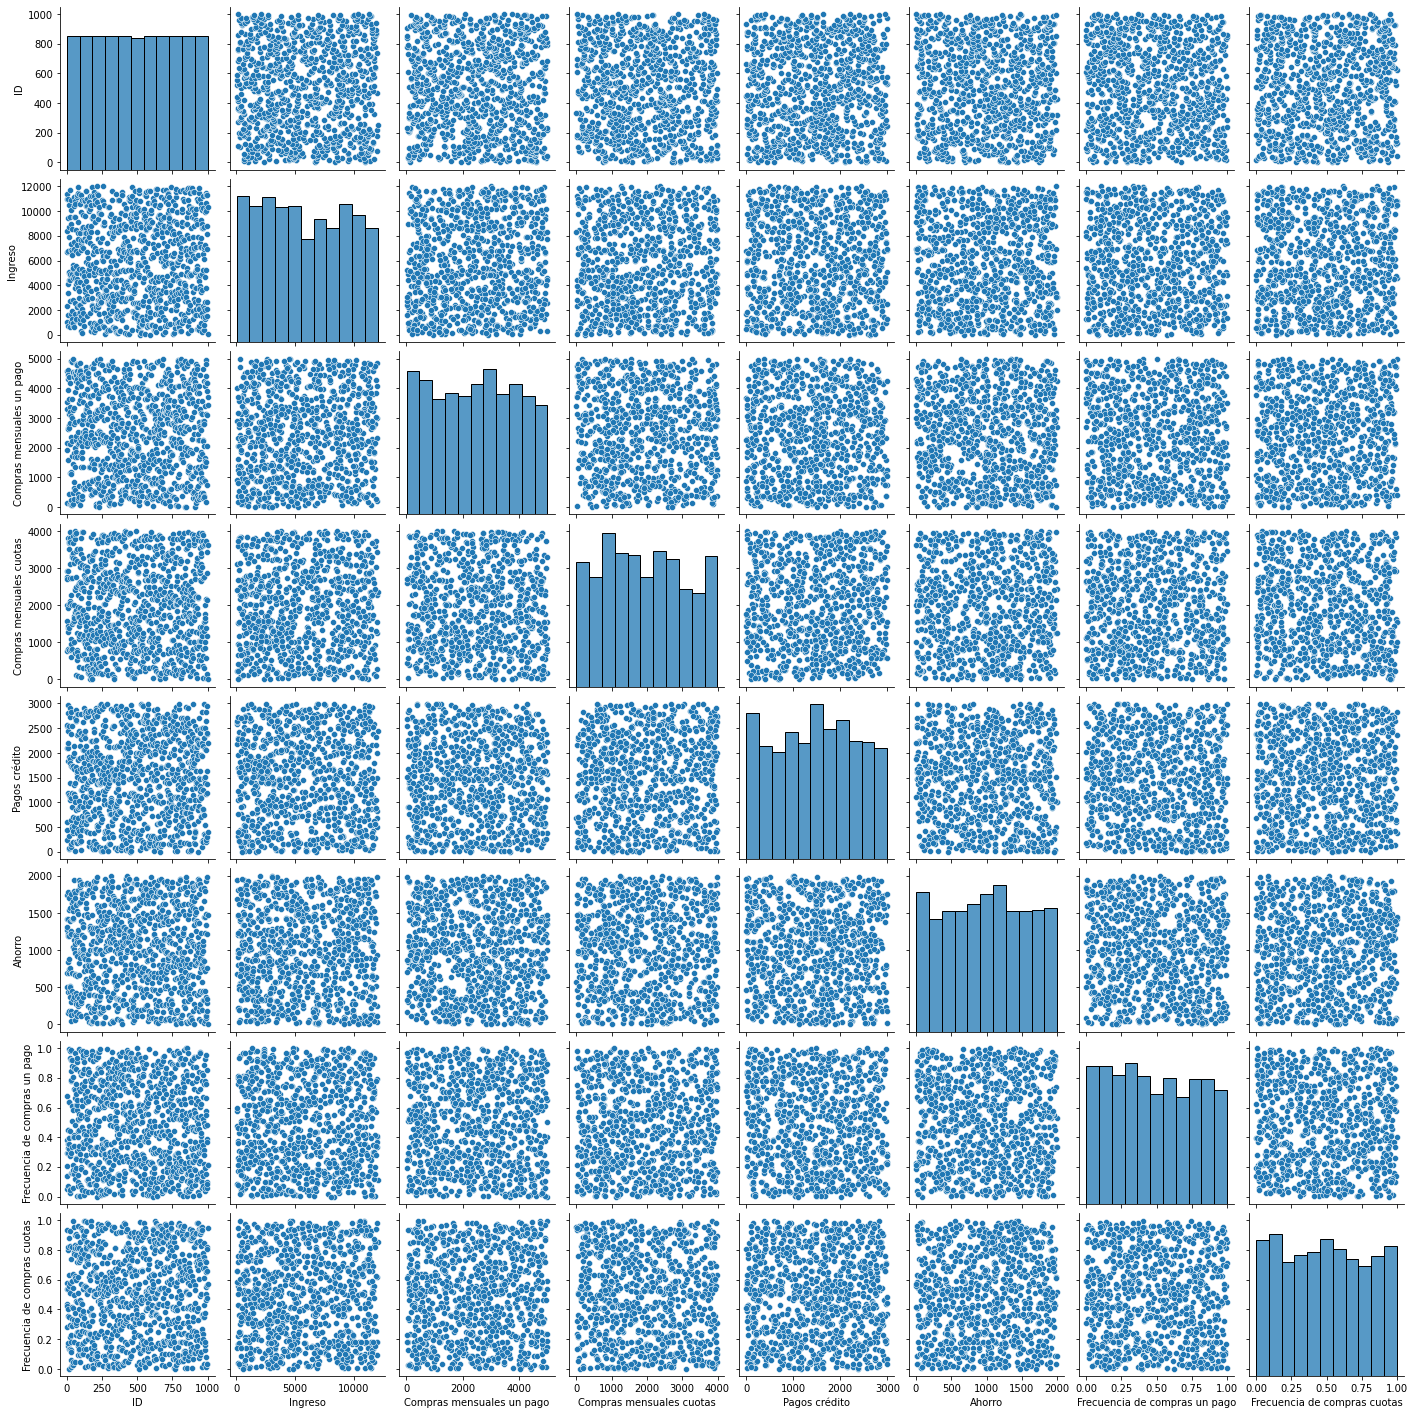

In [41]:
#voy mirando en cada columna cuales serian sus outliers 
sns.pairplot(datos)
#en diagonal me da los graficos de cada uno

In [73]:
#para eliminar los datos nulos
datos = datos.dropna() #elimina filas con datos nulos
datos

#es lo mismo que hacer esto:
#datos.dropna(inplace=True) #inplace=True:para que se eliminen los duplicados en la misma lista
#datos

#aux:en este caso pocentaje de datos nulos, es bajo en general, por ende los elimino(sin miedo a que se modifique estadistica)
#aux:en la fila donde hay un dato nulo->me borra toda esa fila
#aux:si quisieras borrar solo datos nulos deuna columna en particular:
#datos_sin_nulos_de_ingreso=datos["Ingreso"].dropna()   ->pero en este ej no sirve hacer esto (dado que yo necesito ver la comparacion de todo con todo, no podes comparar nro contra nada)

,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...,...,...,...,...
994,995,Bar,Espie,bespierm@blogs.com,1524.82,4175.25,159.15,1185.31,1218.24,0.4804,0.4750
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,999,Clyve,Pilling,cpillingrq@marriott.com,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


In [66]:
#me fijo la longitud de la lista previo a eliminar duplicados ->en este caso me fijo por ejemplo en columna"Ingreso"
len(datos["Ingreso"])
#aux: deberia dar otro nro segun guille ->CONSULTAR

1000

In [77]:
#para ver si tengo duplicados o no:
#elimino los duplicados de la lista y me fijo en lo q me devuelve si me cambio o no la longitud de la lista

datos=datos.drop_duplicates() #aca elimino los duplicados de la lista
datos

#es lo mismo que hacer esto:
#datos.drop_duplicates(inplace=True) #inplace=True:para que se eliminen los duplicados en la misma lista
#datos



,ID,Nombre,Apellido,Mail,Ingreso,Compras mensuales un pago,Compras mensuales cuotas,Pagos crédito,Ahorro,Frecuencia de compras un pago,Frecuencia de compras cuotas
0,1,Dena,Bruins,dbruins0@instagram.com,10962.03,2165.91,1576.02,2549.02,1738.78,0.1416,0.4345
1,2,Gisele,Fliege,gfliege1@xing.com,996.87,132.90,2755.58,242.53,1424.95,0.6752,0.9371
2,3,Emili,Brimmicombe,ebrimmicombe2@tmall.com,2339.14,1914.43,763.30,2097.06,1272.98,0.2938,0.5352
3,4,Bryanty,Oman,boman3@wired.com,8356.70,4579.06,2697.44,434.86,687.89,0.3827,0.5770
4,5,Diane,Adamovitz,dadamovitz4@digg.com,6676.88,3301.44,2924.04,596.96,1306.75,0.0512,0.2847
...,...,...,...,...,...,...,...,...,...,...,...
994,995,Bar,Espie,bespierm@blogs.com,1524.82,4175.25,159.15,1185.31,1218.24,0.4804,0.4750
995,996,Adore,Kearle,akearlern@mayoclinic.com,6916.30,739.44,2132.93,2400.08,1990.31,0.3912,0.0311
997,998,Morna,Arrault,marraultrp@netscape.com,2089.96,2059.00,1177.63,1638.11,342.47,0.3671,0.8045
998,999,Clyve,Pilling,cpillingrq@marriott.com,10311.18,3449.11,3617.03,2202.28,3.93,0.2113,0.5737


In [78]:
len(datos["Ingreso"]) #ahora luego de eliminar duplicados me vuelvo a fijar longitud y si disminuyo, significa que esa diferencia es la cant de duplicados que tenia
#aux: deberia dar otro nro segun guille ->CONSULTAR

756

In [79]:
#para los outliers: (outliers:son los datos que estan lejos de la curva que representa mi distribucion)
#auxiliar para ver q valor da:
datos["Ingreso"].quantile(0.95) #vemos los quantiles->quantil es una forma de separar una distribucion en partes, en este caso seria en n partes)
#si veo distribucion que tiene outliers ya sea al principio o al final o en ambos, los debo eliminar a esos datos que sobran 
#aca de columna ingreso -> estoy tomando el 95% de mi distribucion(parte de distribucion que me importa, el otro 5% puede estar lejos y no me importaria) y eso llega hasta el valor que me devuelve 

#(aux:por ej el quartil se separa en 4 partes(25%, 50%, 75% y 100%)

11325.5125

In [81]:
#aux:para saber que valor da:
datos["Ingreso"].quantile(0.05)

590.78

In [84]:
#para eliminar los outliers hago esto:
#esto lo hago tal cual y con estas mismas proporciones (0.95 y 0.05) para TODAS las columnas numericas -> en este caso solo lo hice para la columna "ingreso"
Cs=datos["Ingreso"].quantile(0.95) #cuantil superior ->muestra 95% de mi distribucion
Ci=datos["Ingreso"].quantile(0.05) #cuantil inferior ->muestra el 5% de mi distribucion
datos=datos[(datos["Ingreso"]>=Ci) & (datos["Ingreso"]<=Cs)] #aca filtro para quedarme solo con los datos que estan entre el cuantil inferior y superior
#filtro en base a estos nros->en mis datos yo quiero que en columna "ingreso" mis datos sean mayores a 5% y menores a 95%
#todos los q estan mas alla o menos los tendremos que borrar

#1hs10min


<AxesSubplot:xlabel='Ingreso', ylabel='Count'>

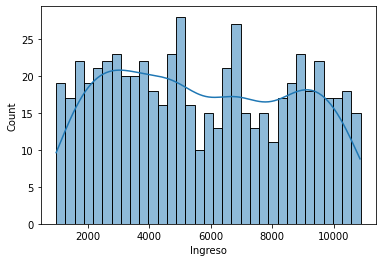

In [85]:
#ahora al hacer nuevamente el grafico, luego de filtrar los datos, veo que los datos que quedan son los que estan entre el cuantil inferior y superior
sns.histplot(data=datos, x="Ingreso", binwidth=300, kde=True) #data=nombre de nuestro df, x=nombre de columna que queremos ver de nuestra tablita, binwidth=ancho de los bins(columnas)(agrupa datos de a la cantidad que yo le indique), kde=kernel density estimation(linea de densidad)

In [4]:
#ahora si ->para normalizar los datos pongo esto: aux:  fit_transform(df[lista de columnas a normalizar])
scaler=StandardScaler() #instancio el objeto
datos_escaleado=scaler.fit_transform(datos[["Ingreso", "Compras mensuales un pago", "Compras mensuales cuotas", "Pagos crédito", "Ahorro", "Frecuencia de compras un pago", "Frecuencia de compras cuotas"]]) #le paso los datos a escalar

#la lista tambien se puede meter dentro de una variable y poner adentro de la funcion directo el nombre de la variable